In [162]:
from autenticazione.autenticazione import start_kaggle
start_kaggle()


In [163]:
# Secondo passo: Download del dataset
# Visualizzare la lista dei dataset
import kaggle

key_search = "dog"

datasets = kaggle.api.datasets_list(search=key_search)

In [164]:
# stampo la lista dei dataset
# la lista di dataset è una lista di dizionari, il cui valore di owner e' contenuto nella key 'ref'
for dataset in datasets:
    print(dataset['ref'])

tongpython/cat-and-dog
dansbecker/hot-dog-not-hot-dog
jessicali9530/stanford-dogs-dataset
marshuu/dog-breeds
shaunthesheep/microsoft-catsvsdogs-dataset
andrewmvd/dog-and-cat-detection
danielshanbalico/dog-emotion
whenamancodes/dog-adoption
chetankv/dogs-cats-images
dhruvildave/dogecoin-historical-data
mmoreaux/audio-cats-and-dogs
devzohaib/dog-emotions-prediction
kingburrito666/largest-dog-breed-data-set
d4rklucif3r/cat-and-dogs
arpitjain007/dog-vs-cat-fastai
mohamedchahed/dog-breeds
new-york-city/nyc-dog-names
gpiosenka/70-dog-breedsimage-data-set
kmader/dogs-of-zurich
biaiscience/dogs-vs-cats


In [165]:
# scelgo il dataset che mi interessa e lo scarico
# imposto il path in cui scaricare il dataset
# path = os.path.dirname(os.path.abspath(__file__)) + '/dataset' su juptyer notebook non funziona
# usare invece sys.path[0] + '/dataset' con la libreria sys
import sys
path = sys.path[0] + '/dataset'

# scelgo il dataset che mi interessa
dt_scelto = 'dhruvildave/dogecoin-historical-data'

# scarico il dataset
kaggle.api.dataset_download_files(dt_scelto, path=path, unzip=True)

In [166]:
# ispeziono il dataset
# creo un dataframe con il dataset
import pandas as pd
name_file = '/'+'DOGE-USD.csv'
df = pd.read_csv(path + name_file)

In [167]:
# esploriamo il dataset
# stampo le prime 5 righe del dataset
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  2017-11-09  0.001207  0.001415  0.001181  0.001415   0.001415  6259550.0
1  2017-11-10  0.001421  0.001431  0.001125  0.001163   0.001163  4246520.0
2  2017-11-11  0.001146  0.001257  0.001141  0.001201   0.001201  2231080.0
3  2017-11-12  0.001189  0.001210  0.001002  0.001038   0.001038  3288960.0
4  2017-11-13  0.001046  0.001212  0.001019  0.001211   0.001211  2481270.0


In [168]:
# stampiamo alcune informazioni sul dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1760 non-null   float64
 2   High       1760 non-null   float64
 3   Low        1760 non-null   float64
 4   Close      1760 non-null   float64
 5   Adj Close  1760 non-null   float64
 6   Volume     1760 non-null   float64
dtypes: float64(6), object(1)
memory usage: 96.4+ KB
None


In [169]:
# trasformiamo la colonna Date in un oggetto datetime
df['Date'] = pd.to_datetime(df['Date'])

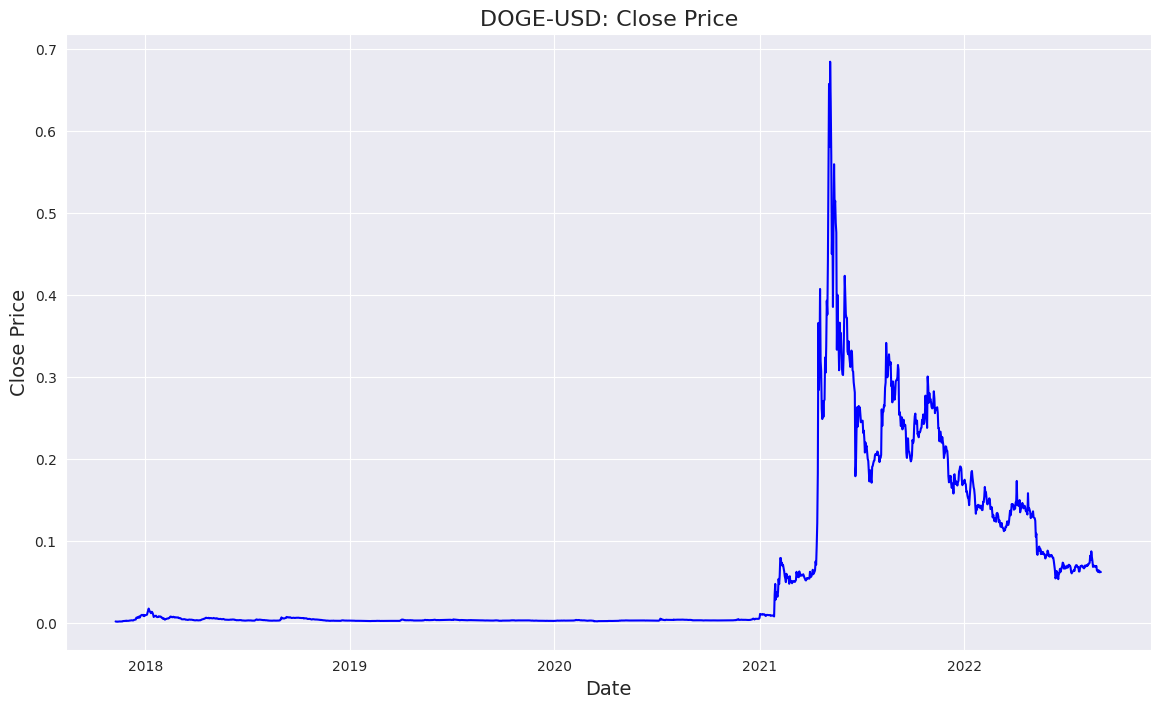

In [170]:
# importo le librerie per la visualizzazione
import matplotlib.pyplot as plt
import seaborn as sns

# configuriamo la visualizzazione
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)

# visualizzo il grafico
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('DOGE-USD: Close Price', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.show()

In [171]:
# facciamo un po' di analisi esplorativa
# calcoliamo la variazione percentuale giornaliera percentuale

df['Daily Change'] = df['Close'].pct_change() * 100
print(df.head())

        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2017-11-09  0.001207  0.001415  0.001181  0.001415   0.001415  6259550.0   
1 2017-11-10  0.001421  0.001431  0.001125  0.001163   0.001163  4246520.0   
2 2017-11-11  0.001146  0.001257  0.001141  0.001201   0.001201  2231080.0   
3 2017-11-12  0.001189  0.001210  0.001002  0.001038   0.001038  3288960.0   
4 2017-11-13  0.001046  0.001212  0.001019  0.001211   0.001211  2481270.0   

   Daily Change  
0           NaN  
1    -17.809187  
2      3.267412  
3    -13.572023  
4     16.666667  


In [172]:
# creiamo una colonna dei valori di chiusura sfalsata di un giorno in avanti
df['Close tomorrow'] = df['Close'].shift(-1)
print(df.head())

        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2017-11-09  0.001207  0.001415  0.001181  0.001415   0.001415  6259550.0   
1 2017-11-10  0.001421  0.001431  0.001125  0.001163   0.001163  4246520.0   
2 2017-11-11  0.001146  0.001257  0.001141  0.001201   0.001201  2231080.0   
3 2017-11-12  0.001189  0.001210  0.001002  0.001038   0.001038  3288960.0   
4 2017-11-13  0.001046  0.001212  0.001019  0.001211   0.001211  2481270.0   

   Daily Change  Close tomorrow  
0           NaN        0.001163  
1    -17.809187        0.001201  
2      3.267412        0.001038  
3    -13.572023        0.001211  
4     16.666667        0.001184  


In [173]:
# stampiamo le ultime 5 righe del dataset
print(df.tail())

           Date      Open      High       Low     Close  Adj Close  \
1756 2022-08-31  0.061534  0.063333  0.061058  0.061330   0.061330   
1757 2022-09-01  0.061336  0.062479  0.060194  0.062372   0.062372   
1758 2022-09-02  0.062372  0.062712  0.060947  0.061635   0.061635   
1759 2022-09-03       NaN       NaN       NaN       NaN        NaN   
1760 2022-09-04  0.062682  0.062744  0.062667  0.062696   0.062696   

           Volume  Daily Change  Close tomorrow  
1756  309748693.0     -0.316944        0.062372  
1757  328765413.0      1.699005        0.061635  
1758  273453013.0     -1.181620             NaN  
1759          NaN      0.000000        0.062696  
1760  297513408.0      1.721425             NaN  


In [174]:
# cerchiamo i valori nulli
print(df.isnull().sum())

# eliminiamo le righe con valori nulli
df.dropna(inplace=True)

Date              0
Open              1
High              1
Low               1
Close             1
Adj Close         1
Volume            1
Daily Change      1
Close tomorrow    2
dtype: int64


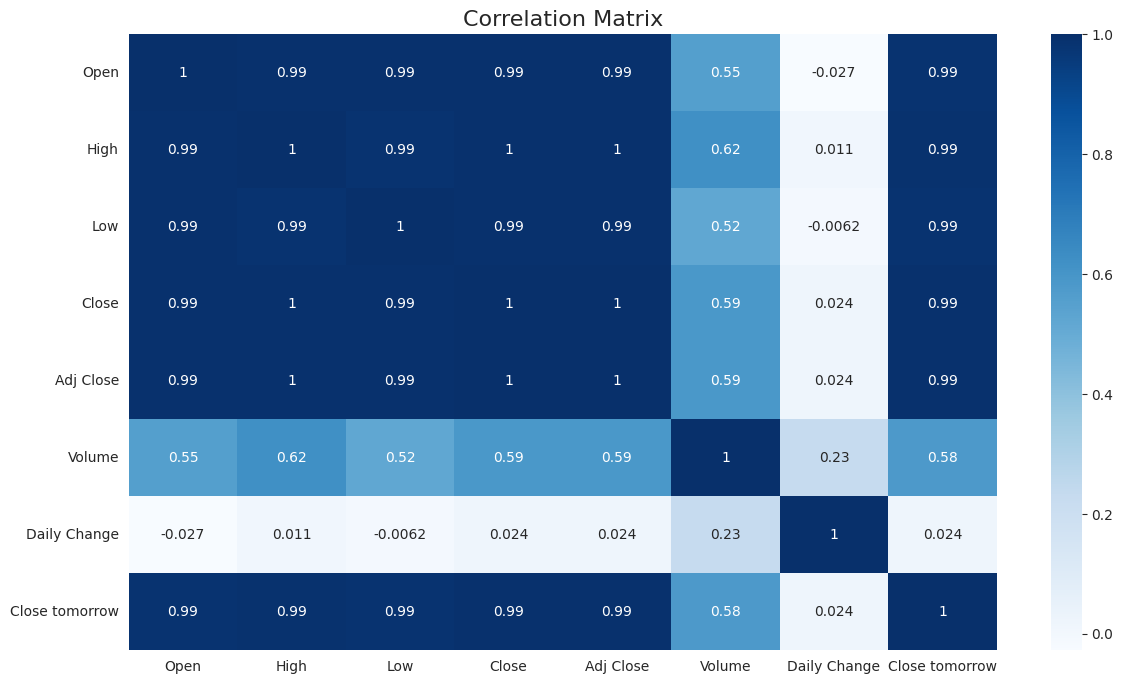

In [175]:
# vediamo le possibili correlazioni tra le variabili
# importiamo la libreria per la visualizzazione
corr = df.corr()

# visualizziamo la matrice di correlazione
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [176]:
"""
# scaliamo i dati
# importiamo la libreria
from sklearn.preprocessing import StandardScaler

# creiamo un oggetto StandardScaler
scaler = StandardScaler()

# creiamo un array con i dati da scalare
data_to_scale = df[['Volume']]

# scaliamo i dati
scaled_data = scaler.fit_transform(data_to_scale)

# creiamo un dataframe con i dati scalati
df_scaled = pd.DataFrame(data=scaled_data, columns=['Volume'])

# sostiuiamo la colonna Volume con i dati scalati
df['Volume'] = df_scaled['Volume']

# visualizziamo il dataset
print(df.head())
"""

"\n# scaliamo i dati\n# importiamo la libreria\nfrom sklearn.preprocessing import StandardScaler\n\n# creiamo un oggetto StandardScaler\nscaler = StandardScaler()\n\n# creiamo un array con i dati da scalare\ndata_to_scale = df[['Volume']]\n\n# scaliamo i dati\nscaled_data = scaler.fit_transform(data_to_scale)\n\n# creiamo un dataframe con i dati scalati\ndf_scaled = pd.DataFrame(data=scaled_data, columns=['Volume'])\n\n# sostiuiamo la colonna Volume con i dati scalati\ndf['Volume'] = df_scaled['Volume']\n\n# visualizziamo il dataset\nprint(df.head())\n"

In [177]:
# eliminiamo le colonne che non ci servono
df.drop(['Adj Close', 'Close'], axis=1, inplace=True)

In [178]:
df.head()

,Date,Open,High,Low,Volume,Daily Change,Close tomorrow
1,2017-11-10,0.001421,0.001431,0.001125,4246520.0,-17.809187,0.001201
2,2017-11-11,0.001146,0.001257,0.001141,2231080.0,3.267412,0.001038
3,2017-11-12,0.001189,0.001210,0.001002,3288960.0,-13.572023,0.001211
4,2017-11-13,0.001046,0.001212,0.001019,2481270.0,16.666667,0.001184
5,2017-11-14,0.001201,0.001239,0.001131,2660340.0,-2.229562,0.001339


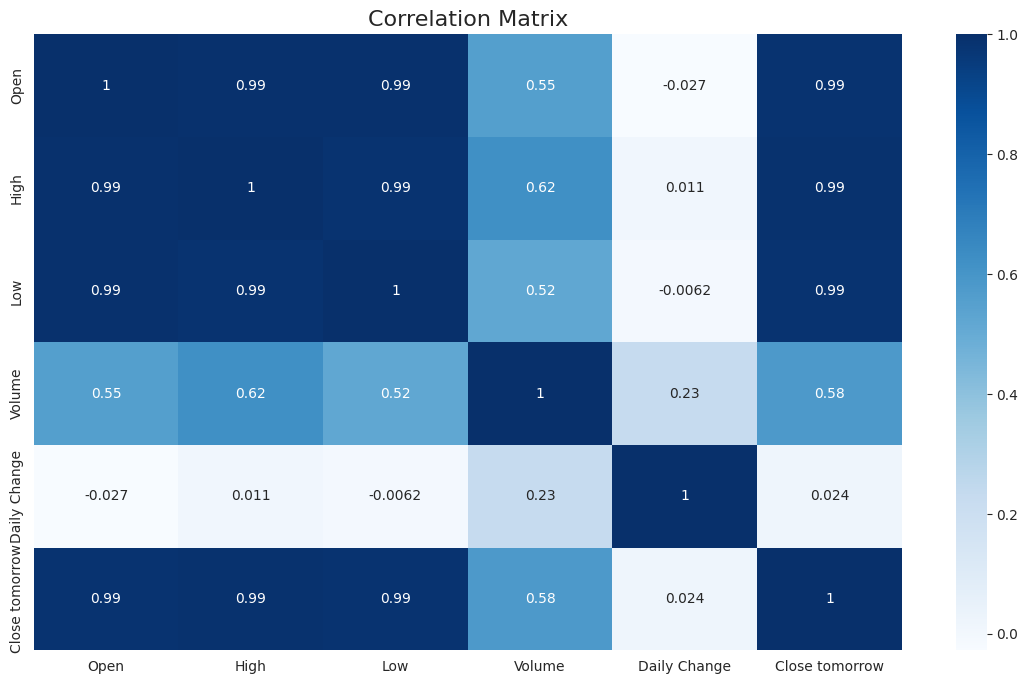

In [179]:
# vediamo le nuove correlazioni tra la chiusura del giorno dopo con le altre variabili del dataset al giorno prima
corr = df.corr()

# visualizziamo la matrice di correlazione
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [180]:
# proviamo a fare una previsione con una regressione lineare multipla
# importiamo le librerie
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# eliminiamo le righe con valori nulli
df.dropna(inplace=True)

# creiamo un array con le variabili indipendenti
X = df.drop(['Close tomorrow', 'Date'], axis=1).values
y = df['Close tomorrow'].values

# dividiamo il dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# creiamo un oggetto LinearRegression
model = LinearRegression()

# addestriamo il modello
model.fit(X_train, y_train)

# facciamo una previsione
y_pred = model.predict(X_test)

# valutiamo il modello
from sklearn.metrics import mean_squared_error, r2_score

# visualizziamo i parametri del modello
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

# visualizziamo le metriche
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# visualizziamo a video il rapporto tra i valori predetti e quelli reali
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# creiamo una colonna con le differenze tra i valori predetti e quelli reali
df_pred['Difference'] = (df_pred['Predicted'] - df_pred['Actual']) / df_pred['Actual'] * 100

# visualizziamo le prime 5 righe del dataset
print(df_pred.head(100))


Coefficients: 
 [-2.50831115e-01  6.74306309e-01  5.74513800e-01 -6.84785562e-13
  9.93599340e-05]
Intercept: 
 0.00034701330501801797
Mean squared error: 0.00
Coefficient of determination: 0.97
      Actual  Predicted  Difference
0   0.003105   0.003331    7.279713
1   0.002787   0.002635   -5.461984
2   0.268345   0.287953    7.307095
3   0.157565   0.169524    7.589807
4   0.004517   0.005019   11.112166
..       ...        ...         ...
95  0.182207   0.114535  -37.140342
96  0.002555   0.003121   22.138937
97  0.002587   0.002684    3.737804
98  0.003313   0.003437    3.756099
99  0.002254   0.002047   -9.185139

[100 rows x 3 columns]


In [181]:
# prediciamo il prezzo di chiusura di domani

df['Close tomorrow pred'] = model.predict(X)

# visualizziamo il dataset
print(df.head())

        Date      Open      High       Low     Volume  Daily Change  \
1 2017-11-10  0.001421  0.001431  0.001125  4246520.0    -17.809187   
2 2017-11-11  0.001146  0.001257  0.001141  2231080.0      3.267412   
3 2017-11-12  0.001189  0.001210  0.001002  3288960.0    -13.572023   
4 2017-11-13  0.001046  0.001212  0.001019  2481270.0     16.666667   
5 2017-11-14  0.001201  0.001239  0.001131  2660340.0     -2.229562   

   Close tomorrow  Close tomorrow pred  
1        0.001201            -0.000171  
2        0.001038             0.001886  
3        0.001211             0.000090  
4        0.001184             0.003142  
5        0.001339             0.001308  


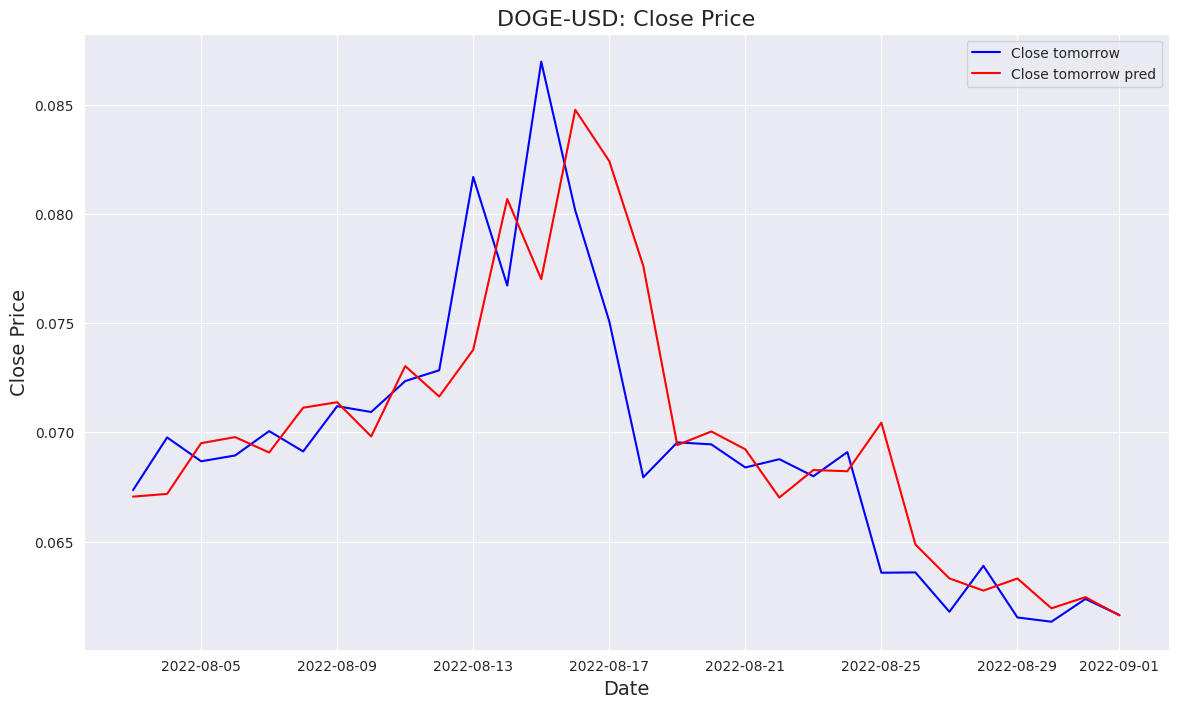

In [182]:
# visualizziamo il grafico degli ultimi 30 giorni
plt.plot(df['Date'].tail(30), df['Close tomorrow'].tail(30), color='blue')
plt.plot(df['Date'].tail(30), df['Close tomorrow pred'].tail(30), color='red')
plt.title('DOGE-USD: Close Price', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend(['Close tomorrow', 'Close tomorrow pred'])
plt.show()


In [183]:
# proviamo ora con una regressione polinomiale
# importiamo le librerie
from sklearn.preprocessing import PolynomialFeatures

# creiamo un oggetto PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

# creiamo un array con le variabili indipendenti
X = df.drop(['Close tomorrow', 'Date'], axis=1).values
y = df['Close tomorrow'].values

# dividiamo il dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creiamo un array con le variabili indipendenti polinomiali
X_poly = poly_reg.fit_transform(X_train)

# creiamo un oggetto LinearRegression
model = LinearRegression()

# addestriamo il modello
model.fit(X_poly, y_train)

# facciamo una previsione
y_pred = model.predict(poly_reg.fit_transform(X_test))

# visualizziamo i parametri del modello
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

# visualizziamo le metriche
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))



Coefficients: 
 [-3.47603137e-17 -2.75102088e-18 -1.26567618e-18 -1.23969501e-18
  2.77265451e-11 -2.46587823e-16 -1.27308265e-18 -2.28736995e-19
 -2.22466374e-19 -2.21141954e-19 -1.07120839e-10  2.12339027e-18
 -2.19839652e-19 -2.13619414e-19 -2.16471805e-19  1.73232467e-11
  1.90023704e-18 -2.12871748e-19 -2.13658826e-19  5.95781736e-11
  2.12906870e-18 -2.13508411e-19 -6.52802816e-22 -4.27330148e-14
  7.27885142e-11 -1.08012891e-15  1.77901806e-18 -2.11376524e-19]
Intercept: 
 0.03228911740593268
Mean squared error: 0.01
Coefficient of determination: 0.45


In [184]:
# aggiungiamo una colonna con i valori predetti con la regressione polinomiale
df['Close tomorrow pred poly'] = model.predict(poly_reg.fit_transform(X))

# visualizziamo il dataset
print(df.head())

        Date      Open      High       Low     Volume  Daily Change  \
1 2017-11-10  0.001421  0.001431  0.001125  4246520.0    -17.809187   
2 2017-11-11  0.001146  0.001257  0.001141  2231080.0      3.267412   
3 2017-11-12  0.001189  0.001210  0.001002  3288960.0    -13.572023   
4 2017-11-13  0.001046  0.001212  0.001019  2481270.0     16.666667   
5 2017-11-14  0.001201  0.001239  0.001131  2660340.0     -2.229562   

   Close tomorrow  Close tomorrow pred  Close tomorrow pred poly  
1        0.001201            -0.000171                  0.032410  
2        0.001038             0.001886                  0.032351  
3        0.001211             0.000090                  0.032382  
4        0.001184             0.003142                  0.032357  
5        0.001339             0.001308                  0.032363  


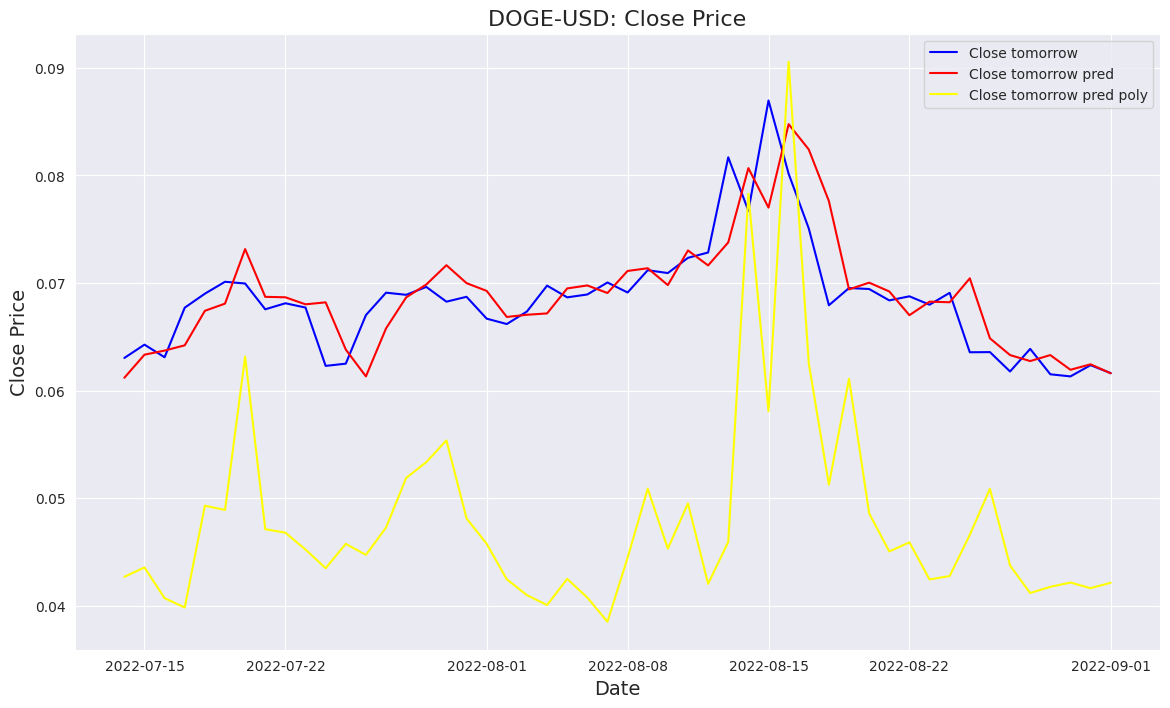

In [185]:
# visualizziamo il grafico degli ultimi x giorni
d = 50
plt.plot(df['Date'].tail(d), df['Close tomorrow'].tail(d), color='blue')
plt.plot(df['Date'].tail(d), df['Close tomorrow pred'].tail(d), color='red')
plt.plot(df['Date'].tail(d), df['Close tomorrow pred poly'].tail(d), color='yellow')
plt.title('DOGE-USD: Close Price', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend(['Close tomorrow', 'Close tomorrow pred','Close tomorrow pred poly'])
plt.show()

In [186]:
# importiamo le libreire pandas finanziarie
import pandas_ta as ta
import numpy as np

# calcoliamo ora le medie mobili esponenziali (EMA) a 5 e 20 giorni e le aggiungiamo al dataset
df['EMA5_ct'] = ta.ema(df['Close tomorrow'], length=5)
df['EMA20_ct'] = ta.ema(df['Close tomorrow'], length=20)
df['EMA5_ct_pred'] = ta.ema(df['Close tomorrow pred'], length=5)
df['EMA20_ct_pred'] = ta.ema(df['Close tomorrow pred'], length=20)
df['EMA5_ct_pred_poly'] = ta.ema(df['Close tomorrow pred poly'], length=5)
df['EMA20_ct_pred_poly'] = ta.ema(df['Close tomorrow pred poly'], length=20)

# calcoliamo i punti di inversione di trend
df['pos_inversione'] = np.where((df['EMA5_ct'] > df['EMA20_ct']), 1, 0)
df['scatter'] = df['pos_inversione'].diff()
df['Sell'] = np.where((df['scatter'] == 1), df['Close tomorrow'], np.nan)
df['Buy'] = np.where((df['scatter'] == -1), df['Close tomorrow'], np.nan)
df['pos_inversione_pred'] = np.where((df['EMA5_ct_pred'] > df['EMA20_ct_pred']), 1, 0)
df['scatter_pred'] = df['pos_inversione_pred'].diff()
df['Sell_pred'] = np.where((df['scatter_pred'] == 1), df['Close tomorrow'], np.nan)
df['Buy_pred'] = np.where((df['scatter_pred'] == -1), df['Close tomorrow'], np.nan)
df['pos_inversione_pred_poly'] = np.where((df['EMA5_ct_pred_poly'] > df['EMA20_ct_pred_poly']), 1, 0)
df['scatter_pred_poly'] = df['pos_inversione_pred_poly'].diff()
df['Sell_pred_poly'] = np.where((df['scatter_pred_poly'] == 1), df['Close tomorrow'], np.nan)
df['Buy_pred_poly'] = np.where((df['scatter_pred_poly'] == -1), df['Close tomorrow'], np.nan)


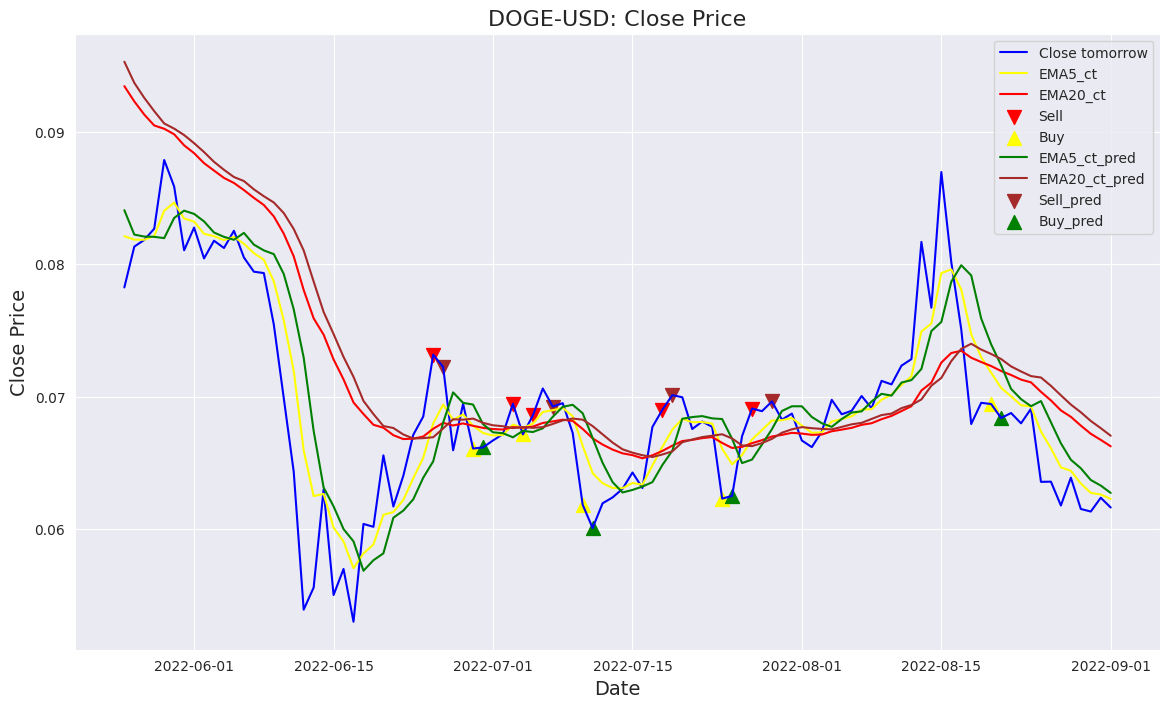

In [187]:
# visualizziamo in un grafico le medie mobili esponenziali a 5 e 20 giorni e i punti di intersezioni
d = 100
plt.plot(df['Date'].tail(d), df['Close tomorrow'].tail(d), color='blue')
plt.plot(df['Date'].tail(d), df['EMA5_ct'].tail(d), color='yellow')
plt.plot(df['Date'].tail(d), df['EMA20_ct'].tail(d), color='red')
plt.scatter(df['Date'].tail(d), df['Sell'].tail(d), color='red', marker='v', s=100)
plt.scatter(df['Date'].tail(d), df['Buy'].tail(d), color='yellow', marker='^', s=100)

plt.plot(df['Date'].tail(d), df['EMA5_ct_pred'].tail(d), color='green')
plt.plot(df['Date'].tail(d), df['EMA20_ct_pred'].tail(d), color='brown')
plt.scatter(df['Date'].tail(d), df['Sell_pred'].tail(d), color='brown', marker='v', s=100)
plt.scatter(df['Date'].tail(d), df['Buy_pred'].tail(d), color='green', marker='^', s=100)

plt.title('DOGE-USD: Close Price', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend(['Close tomorrow', 'EMA5_ct', 'EMA20_ct', 'Sell', 'Buy', 'EMA5_ct_pred', 'EMA20_ct_pred', 'Sell_pred', 'Buy_pred'])
plt.show()


In [188]:
# eliminiamo tutte le colonne nuove create in precedenza
df.drop(['EMA5_ct', 'EMA20_ct', 'EMA5_ct_pred', 'EMA20_ct_pred', 'EMA5_ct_pred_poly', 'EMA20_ct_pred_poly', 'pos_inversione', 'scatter', 'Sell', 'Buy', 'pos_inversione_pred', 'scatter_pred', 'Sell_pred', 'Buy_pred', 'pos_inversione_pred_poly', 'scatter_pred_poly', 'Sell_pred_poly', 'Buy_pred_poly'], axis=1, inplace=True)
df.drop(['Close tomorrow pred', 'Close tomorrow pred poly'], axis=1, inplace=True)

In [189]:
# proviamo ad usare un modello di classificazione per prevedere quando il prezzo aumenta o diminuisce
# creiamo la colonna con la variazione percentuale giornaliera
df['Daily Change'] = df['Close tomorrow'].pct_change() * 100

# creiamo la variazione dei volumi
df['Volume Change'] = df['Volume'].pct_change() * 100
df['Volume Change'] = np.where((df['Volume Change'] >= 0), 'Up', 'Down')

# visualizziamo il dataset
print(df.head())

# eliminiamo le righe con valori nulli
df.dropna(inplace=True)

# ora attribuiamo una stringa alla variazione percentuale giornaliera se positiva o negativa
df['Daily Change'] = np.where((df['Daily Change'] > 0), 'Up', 'Down')

# visualizziamo il dataset
print(df.head())

        Date      Open      High       Low     Volume  Daily Change  \
1 2017-11-10  0.001421  0.001431  0.001125  4246520.0           NaN   
2 2017-11-11  0.001146  0.001257  0.001141  2231080.0    -13.572023   
3 2017-11-12  0.001189  0.001210  0.001002  3288960.0     16.666667   
4 2017-11-13  0.001046  0.001212  0.001019  2481270.0     -2.229562   
5 2017-11-14  0.001201  0.001239  0.001131  2660340.0     13.091216   

   Close tomorrow Volume Change  
1        0.001201          Down  
2        0.001038          Down  
3        0.001211            Up  
4        0.001184          Down  
5        0.001339            Up  
        Date      Open      High       Low     Volume Daily Change  \
2 2017-11-11  0.001146  0.001257  0.001141  2231080.0         Down   
3 2017-11-12  0.001189  0.001210  0.001002  3288960.0           Up   
4 2017-11-13  0.001046  0.001212  0.001019  2481270.0         Down   
5 2017-11-14  0.001201  0.001239  0.001131  2660340.0           Up   
6 2017-11-15  0.001

In [191]:
# usiamo la regressione logistica per prevedere se il prezzo aumenta o diminuisce
# importiamo le librerie
from sklearn.linear_model import LogisticRegression

# diamo un valore numerico alla colonna Volume Change
df['Volume Change'] = np.where((df['Volume Change'] == 'Up'), 1, 0)

# creiamo un array con le variabili indipendenti
X = df.drop(['Close tomorrow', 'Date', 'Daily Change', 'Volume'], axis=1).values
y = df['Daily Change'].values

# dividiamo il dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creiamo un oggetto LogisticRegression
model = LogisticRegression()

# addestriamo il modello
model.fit(X_train, y_train)

# facciamo una previsione
y_pred = model.predict(X_test)

# visualizziamo le metriche
from sklearn.metrics import classification_report, confusion_matrix
# https://stackoverflow.com/questions/62326735/metrics-f1-warning-zero-division
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[174   0]
 [178   0]]
              precision    recall  f1-score   support

        Down       0.49      1.00      0.66       174
          Up       0.00      0.00      0.00       178

    accuracy                           0.49       352
   macro avg       0.25      0.50      0.33       352
weighted avg       0.24      0.49      0.33       352



/home/onizuka-host/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onizuka-host/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onizuka-host/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
